LINKS utilizados como apoio
https://www.youtube.com/watch?v=RF3naeREHOk

Modelo de classificação de flores [Tensorflow] - https://www.kaggle.com/shreyanshu/flower-classification-model-tensorflow/notebook

reshape - https://www.acervolima.com.br/2020/04/forma-da-matriz-com-numpy.html



In [1]:
from google.colab import drive
drive.mount('/content/drive')

# conferir que o Google Drive está devidamente montado (deve aparecer a pasta 'drive')
%ls -la

Mounted at /content/drive
total 20
drwxr-xr-x 1 root root 4096 Jan  3 11:39 ./
drwxr-xr-x 1 root root 4096 Jan  3 11:34 ../
drwxr-xr-x 1 root root 4096 Dec 21 17:29 .config/
drwx------ 5 root root 4096 Jan  3 11:39 drive/
drwxr-xr-x 1 root root 4096 Dec 21 17:29 sample_data/


In [2]:
# Entrando no diretório
%cd drive/My Drive//Exercicios_visao_computacional/processamento_imagens

/content/drive/My Drive/Exercicios_visao_computacional/processamento_imagens


In [3]:
# Listando o conteúdo
%ls -la

total 125244
-rw------- 1 root root    33194 Nov 11 18:27  color_img.jpg
-rw------- 1 root root 26527156 Dec 22 00:27 'Copy of fingerprint.zip'
drwx------ 2 root root     4096 Dec 22 00:29 'Copy of fingerprint.zip (Unzipped Files)'/
-rw------- 1 root root    43539 Nov 28 21:15  edificios.jpg
-rw------- 1 root root    65816 Oct 12 13:12  esquilo-bebe.jpg
drwx------ 2 root root     4096 Dec 20 12:14  face_recognition/
drwx------ 2 root root     4096 Nov 11 20:00  flowers/
drwx------ 2 root root     4096 Nov 22 14:54  flowers_output/
-rw------- 1 root root    56289 Nov 23 16:54  Imagem1_cinza.jpg
-rw------- 1 root root     5916 Nov 23 16:54  Imagem1_cortada.jpg
-rw------- 1 root root   675196 Nov 29 21:46  Imagem1_cv2.jpg
-rw------- 1 root root    93503 Sep 29 02:36  Imagem1.jpg
-rw------- 1 root root    56289 Nov 28 20:41  Imagem1_skimage.jpg
-rw------- 1 root root    13967 Sep 29 03:45  Imagem2.jpg
-rw------- 1 root root     3013 Nov 23 16:54  Imagem_ex_1_1.jpg
-rw------- 1 root root   

In [4]:
# Import the necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random

from keras.optimizers import Nadam ,SGD, RMSprop, Adam
from keras.models import Sequential

from PIL import Image

In [5]:
# Caminho das pastas com as flores
data = "flowers/"

# Lista dos diretórios dentro da pasta de entrada principal
folders = os.listdir(data)

print(folders)

['rose', 'dandelion', 'daisy', 'tulip', 'sunflower']


In [6]:
# Função para diminuir a altura da imagem
def rezise_altura(img, altura):
    width = int(altura * img.shape[1] / img.shape[0]) #calculando a proporção  
    resized = cv2.resize(img, (width, altura), interpolation = cv2.INTER_AREA) # Interpolando os pixels
    sliced = np.zeros((resized.shape[0], (altura-resized.shape[1])//2+1, 3), dtype = "uint8") # completando a imagem com preto
    resized = np.concatenate((sliced,resized,sliced), axis=1) # para a imagem ficar quadrada, completar com preto
    return resized


# Função para diminuir a largura da imagem
def rezise_largura(img, largura):
    height = int(largura * img.shape[0] / img.shape[1]) #calculando a proporção 
    resized = cv2.resize(img, (largura, height), interpolation = cv2.INTER_AREA)  # Interpolando os pixels
    sliced = np.zeros(((largura-resized.shape[0])//2+1, resized.shape[1], 3), dtype = "uint8") # completando a imagem com preto
    resized = np.concatenate((sliced,resized,sliced), axis=0) # para a imagem ficar quadrada, completar com preto
    return resized


In [7]:
# carregar as imagens fazendo o reshape mantendo a proporção
%%time
image_names = []
train_labels = []
train_images = []

size = 128,128

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            #im = cv2.resize(img,size)
            #img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            # FAZENDO O RESIZE DAS IMAGENS
            if img.shape[0] < img.shape[1]:
                im = rezise_largura(img, size[0])
            elif img.shape[0] > img.shape[1]:
                im = rezise_altura(img, size[1])
            else:
                im = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
            im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
            im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
            
            #train_images.append(im) 
            train_images.append(im[0:size[0],0:size[1]])            
        else:
            continue

CPU times: user 14.4 s, sys: 1.61 s, total: 16 s
Wall time: 22min 27s


In [8]:
print ('figura 0', train_images[0].shape, 'figura 1', train_images[1].shape)

figura 0 (128, 128, 3) figura 1 (128, 128, 3)


Text(0.5, 1.0, 'Label:rose')

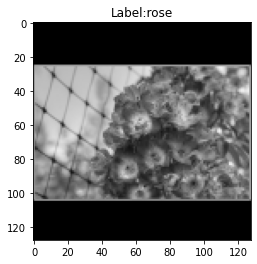

In [9]:
# Visualizando o primeiro exemplo do dataset
plt.imshow(train_images[103], cmap='gray')
plt.title('Label:{}'.format(train_labels[103]))

In [10]:
# Transformando a imagem do tipo array em numpy
import numpy as np
train = np.array(train_images)
print ('Train shape', train.shape)

Train shape (4323, 128, 128, 3)


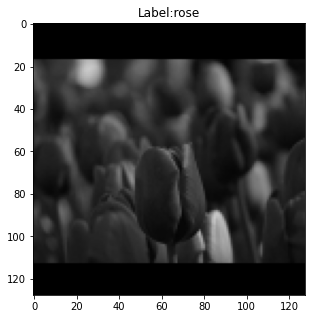

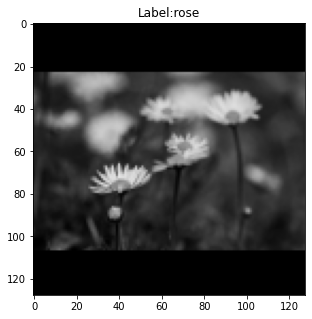

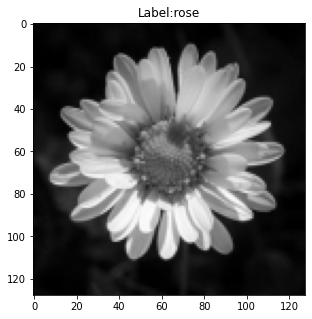

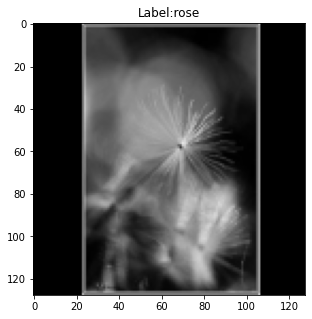

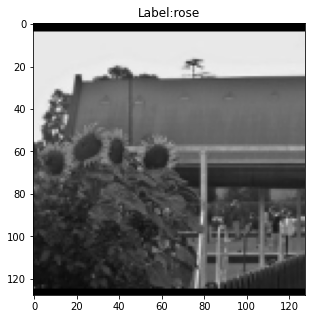

In [57]:
# Mostrando as primeiras 5 imagens
for i in range(5):
    plt.figure(figsize=[5, 5])
    plt.imshow(train[i], cmap='gray')
    plt.title('Label:{}'.format(train_labels[i]))
    plt.show()

In [12]:
# normalizando os valores para RGB

# Convertendo para float32
X_train = train.astype('float32')
# Normalizando os dados
X_train /= 255
print(X_train.shape[0], 'exemplos de treino')

4323 exemplos de treino


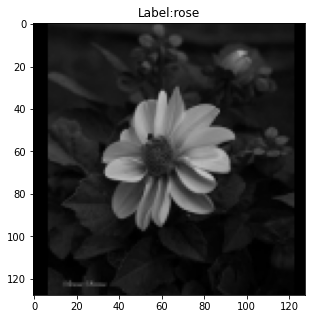

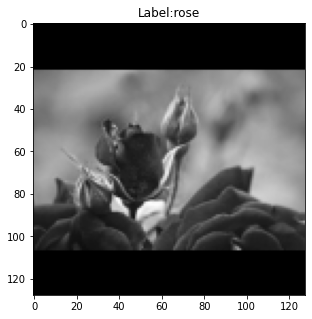

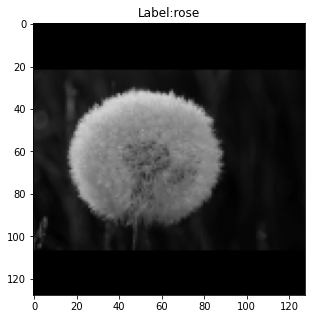

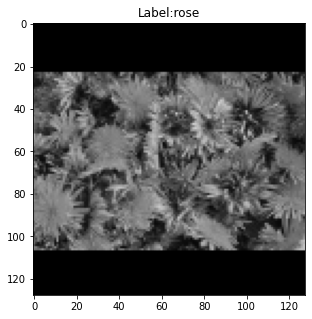

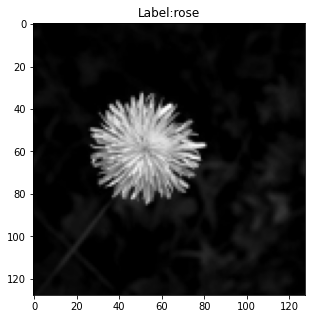

In [58]:
# Mostrando as primeiras 5 imagens
for i in range(5):
    plt.figure(figsize=[5, 5])
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label:{}'.format(train_labels[i]))
    plt.show()

In [14]:
# Normalizando os dados do label
label_dummies = pandas.get_dummies(train_labels)
labels =  label_dummies.values.argmax(1)
print ('Visualizando o dados do unicos do label')
print (pandas.unique(train_labels), pandas.unique(labels))

Visualizando o dados do unicos do label
['rose' 'dandelion' 'daisy' 'tulip' 'sunflower'] [2 1 0 4 3]


In [15]:
# Misturando os rótulos e as imagens aleatoriamente para obter melhores resultados
union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convertendo a lista dos dados misturados para numpy array
train = np.array(train)
labels = np.array(labels)

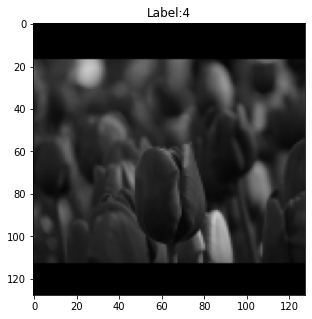

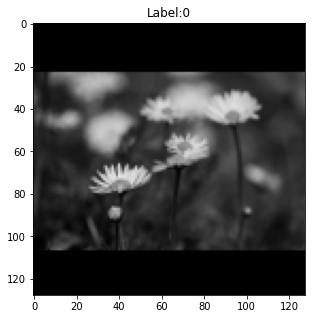

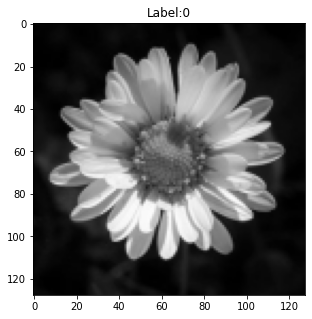

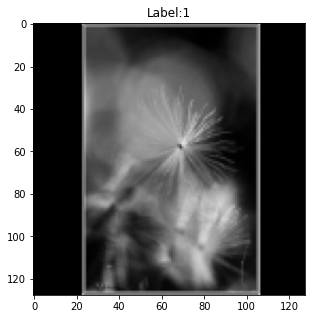

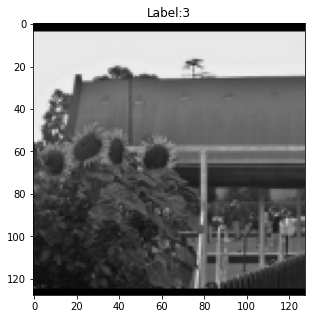

In [59]:
# Mostrando as primeiras 5 imagens
for i in range(5):
    plt.figure(figsize=[5, 5])
    plt.imshow(train[i], cmap='gray')
    plt.title('Label:{}'.format(labels[i]))
    plt.show()

    # ['rose' 'dandelion' 'daisy' 'tulip' 'sunflower'] [2 1 0 4 3]

In [16]:
# dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste
RANDOM_STATE = 2020 #semente aleatória
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(train, labels, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

print ('Quantidade de registros \n')
print('Dados de treino: X =', X_train.shape,'y=', y_train.shape,'\n','Dados de teste: X= ', X_test.shape,'y=', y_test.shape )

Quantidade de registros 

Dados de treino: X = (3458, 128, 128, 3) y= (3458,) 
 Dados de teste: X=  (865, 128, 128, 3) y= (865,)


In [17]:
BATCH_SIZE = 128


In [54]:
# Criação dos dados de treinamento e teste, modificando alguns atributos das imagens (a cada nova época)
# Ref: https://keras.io/api/preprocessing/image/
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
        #zoom_range = 0.1, # Aleatory zoom
        #rotation_range= 15, 
        #width_shift_range=0.1,  # horizontal shift
        #height_shift_range=0.1,  # vertical shift
        #horizontal_flip=True,  
        #vertical_flip=True

        rescale=1./255.,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split = 0.2
    ) 
train_gen.fit(X_train)
train_generator = train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE)
print('Number of examples:',train_generator.n)

#outros parâmetros
# brightness_range (lista de floats): mudança de brilho
# fill_mode: {"constant", "nearest", "reflect" or "wrap"}
# horizontal_flip (boolean): flip horizontal
# vertical_flip (boolean): flip vertical

Number of examples: 3458


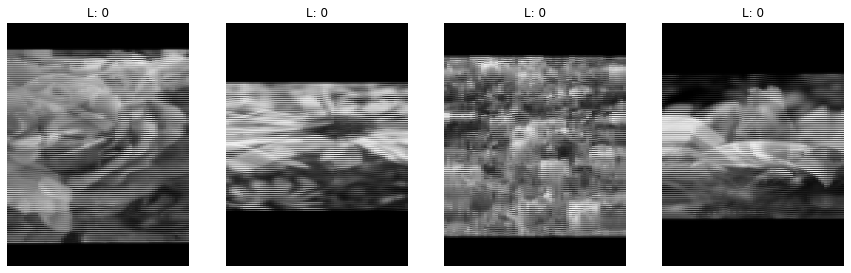

In [55]:
# Plotando alguns exemplos gerados
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
for i in range(4):
  x,y = train_generator.next()
  image = x[i]
  label = y[i]
  ax[i].imshow(image.reshape(256,192),cmap='gray')
  ax[i].set_title("L: {}".format(np.argmax(label)))
  ax[i].axis('off')

  # ['rose' 'dandelion' 'daisy' 'tulip' 'sunflower'] [2 1 0 4 3]

In [20]:
# O ImageDataGerator de Test não possui nenhum modificador, para manter os dados de teste intactos
test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

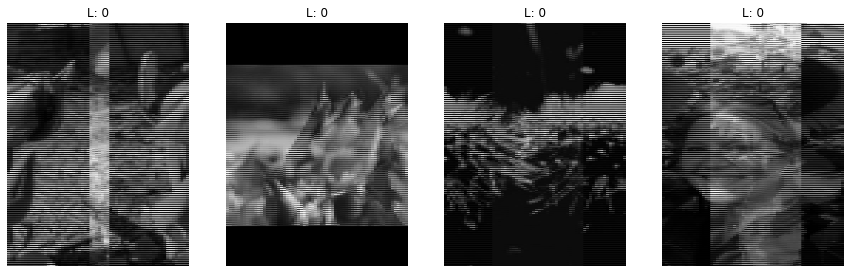

In [62]:
# Plotando alguns exemplos gerados
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
for i in range(4):
  x,y = test_generator.next()
  image = x[i]
  label = y[i]
  ax[i].imshow(image.reshape(256,192),cmap='gray')
  ax[i].set_title("L: {}".format(np.argmax(label)))
  ax[i].axis('off')

  # ['rose' 'dandelion' 'daisy' 'tulip' 'sunflower'] [2 1 0 4 3]

In [21]:
# Hiper-parâmetros => definição
NB_EPOCH = 10 #200 # tem que passar todos os exemplos na rede
BATCH_SIZE = 128 # a cada passo de treinamento, 128 imagens passam pela rede
VERBOSE = 1 # imprimir o resultado para acompanhar a evolução do treinamento ao final de cada época
NB_CLASSES = 10   # número de classes
VALIDATION_SPLIT = 0.2 #  % do dataset reservado para validação - percentual da base que será usada para testes

# inicio dos testes

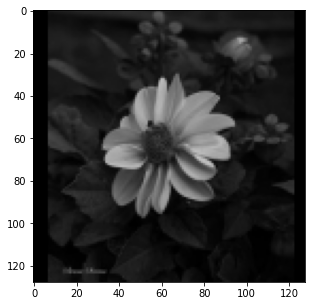

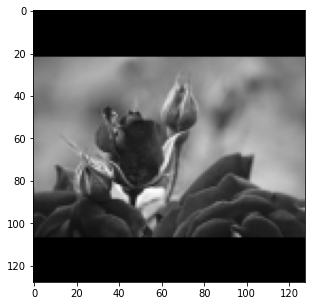

In [35]:
# Mostrando as primeiras 5 imagens de treino
for i in range(2):
    plt.figure(figsize=[5, 5])
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

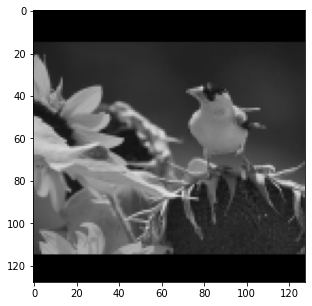

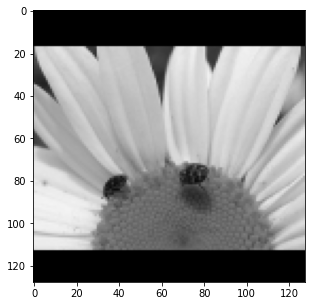

In [36]:
# Mostrando as primeiras 5 imagens de teste
for i in range(2):
    plt.figure(figsize=[5, 5])
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

In [44]:
X_train[1].shape

1

In [66]:
# FONTE: https://medium.com/ensina-ai/tutorial-transfer-learning-3972cac5e9b5

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model

tf_model = Sequential()

# utilizando o modelo da VGG-16, com pesos treinados na ImageNet, este conjunto de dados é composto por mais de 14 milhões de imagens classificadas em mais 
# de 20000 classes.
vgg = keras.applications.VGG16(input_shape=(size[0],size[1],3), include_top = False, weights= 'imagenet')
#4323, 128, 128, 3

#nosso conjunto de flores é muito pequeno, então vamos adicionar camadas densamente conectadas e congelar o treinamento de todas as camadas convolucionais
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
for layer in tf_model.layers[:20]:
    layer.trainable=False

# compilando o modelo
tf_model.compile(optimizer = Nadam(lr = 0.0001) , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
print (X_train.shape, y_train.shape)

(3458, 128, 128, 3) (3458,)


In [26]:
print (X_test.shape, y_test.shape)

(865, 128, 128, 3) (865,)


In [64]:
# Treinando o modelo
history = tf_model.fit(X_train, y_train, batch_size = 1, epochs = 30, initial_epoch = 0, validation_data = (X_test, y_test))

Epoch 1/30


ValueError: ignored

In [ ]:
# Classificando alguns exemplos
pred = tf_model.predict(X_val)
pred = np.argmax(pred, axis = 1)

# fim dos testes

In [ ]:
# Vamos testar com o modelo carregado?
score = model.evaluate(X_test, y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
# Fazendo previsões
predictions = model.predict(X_test)

In [ ]:
# Plotando vários exemplos
def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            # Busca um exemplo aleatorio
            ind = np.random.randint(X_test.shape[0])
            ax[i,j].set_title("L: {} P: {}".format(np.argmax(y_test[ind]),np.argmax(predictions[ind])))
            ax[i,j].imshow(X_test[ind,:].reshape(256,192), cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X_test,y_test)

In [ ]:
# Validando o modelo com os dados de teste

In [ ]:
# Vamos agora avaliar o modelo
score = model.evaluate(X_test, y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
# Imprimindo a primeira imagem e previsão
plt.imshow(np.reshape(X_test[0], (256,192)), cmap=plt.cm.gray)
plt.title('Label: {} Previsão: {}'.format(np.argmax(y_test[0]) ,np.argmax(predictions[0])), fontsize = 20)

Não houve melhora (acho que não consegui implementar corretamente - tentei de tudo, mas as imagens geradas ficaram péssimas e a original só consegui bom resultado com 128x128)

Dados de originais
Test loss: 1.5988646745681763
Test accuracy: 0.22196531295776367

Dados gerados
Test loss: 1.602461814880371
Test accuracy: 0.22196531295776367

A acurácia ficou idêntica e a taxa de perda levemente melhor nos dados originais.